In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# **Dataset Bottle-Update**

In [5]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/datasets/DeepLearning/bottle-updated.csv')

dataset.describe()

,Unnamed: 0,Depthm,T_degC,Salnty
count,864863.000000,864863.000000,853900.000000,817509.000000
mean,432431.000000,226.831951,10.799677,33.840350
std,249664.587267,316.050259,4.243825,0.461843
min,0.000000,0.000000,1.440000,28.431000
25%,216215.500000,46.000000,7.680000,33.488000
50%,432431.000000,125.000000,10.060000,33.863000
75%,648646.500000,300.000000,13.880000,34.196900
max,864862.000000,5351.000000,31.140000,37.034000


In [6]:
dataset.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
dataset.columns

Index(['ID', 'Depthm', 'T_degC', 'Salnty'], dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      864863 non-null  int64  
 1   Depthm  864863 non-null  int64  
 2   T_degC  853900 non-null  float64
 3   Salnty  817509 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 26.4 MB


In [8]:
dataset.head()

,ID,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [9]:
dataset.isnull().sum().sort_values()

ID            0
Depthm        0
T_degC    10963
Salnty    47354
dtype: int64

In [10]:
dataset.dropna(subset=['Salnty'],inplace=True,axis=0)
dataset.drop(columns=['ID'],axis=1,inplace=True)

In [11]:
dataset.isnull().sum().sort_values()

Depthm       0
Salnty       0
T_degC    3262
dtype: int64

In [12]:
for i in dataset.columns:
    if dataset[i].isnull().sum() > 0:
        dataset[i].fillna(dataset[i].astype(float).mean(), inplace=True)

dataset.isnull().sum().sort_values()

Depthm    0
T_degC    0
Salnty    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f293ecc8748>,
      dtype=object)

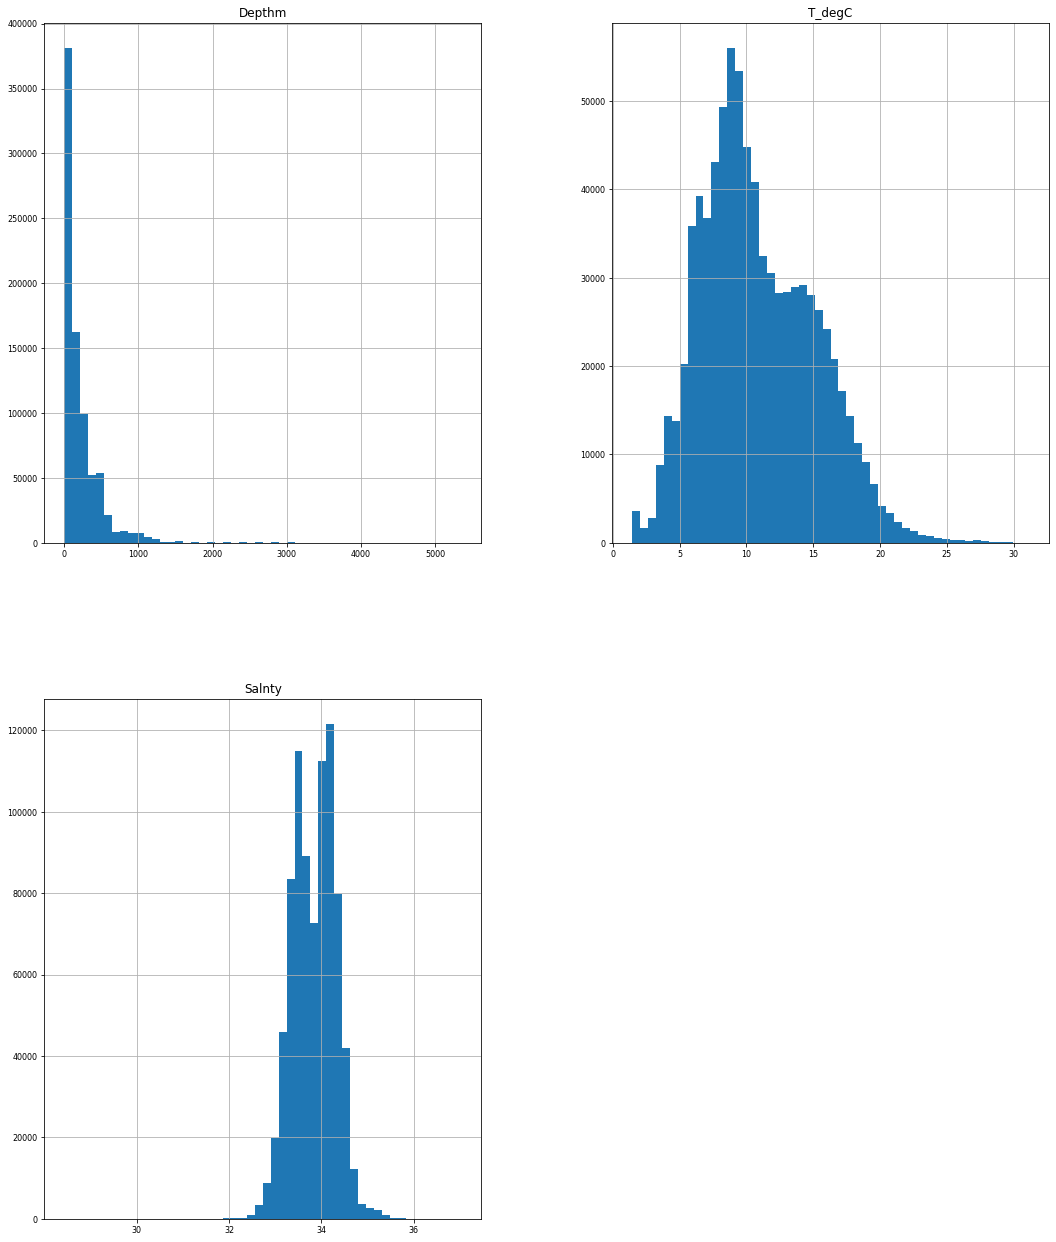

In [13]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

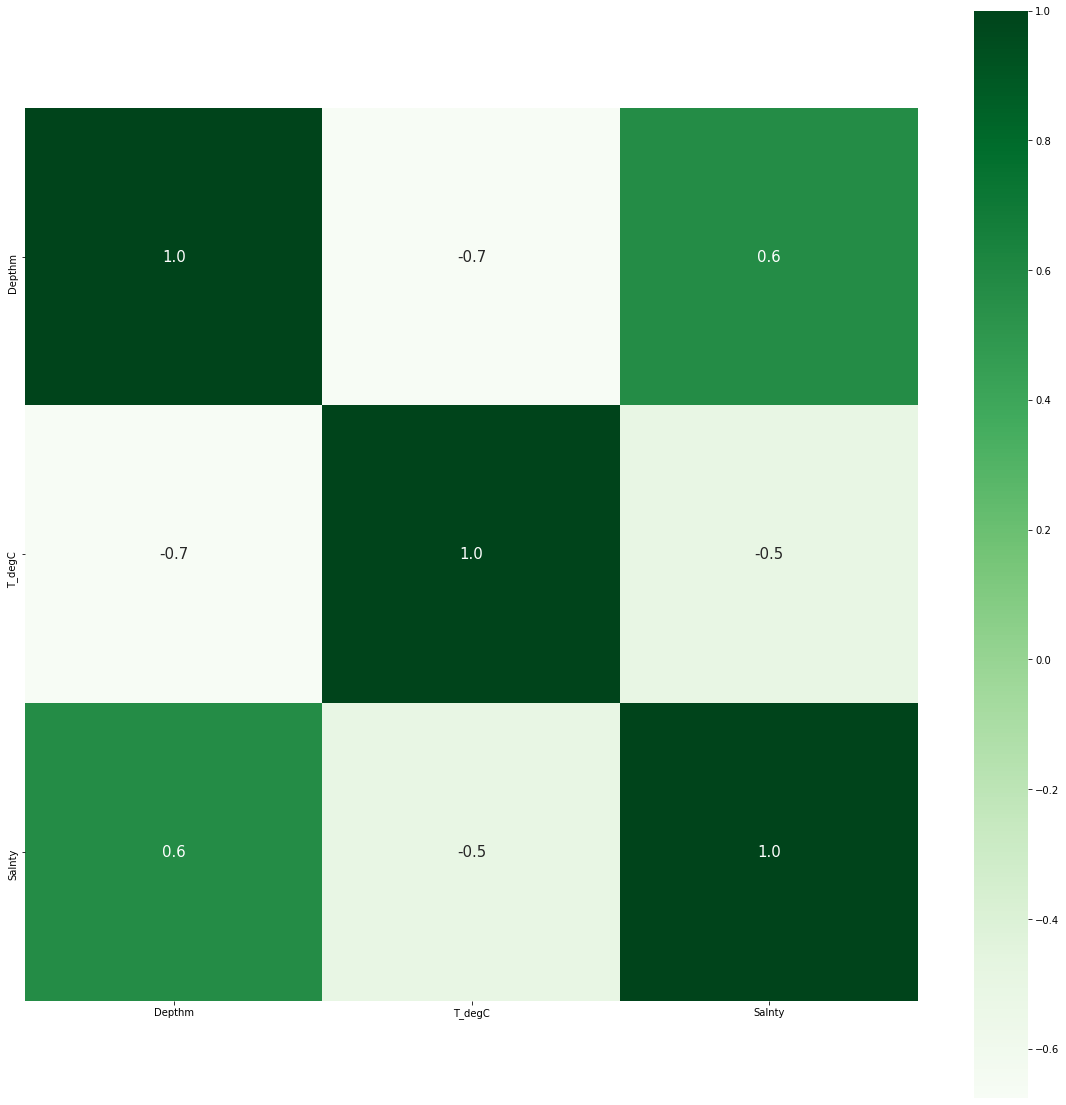

In [14]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# **Linear Regression**

## **Feature Engineering**

In [15]:
label = dataset['Salnty']
features = dataset.drop(['Salnty'], axis=1)

scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(feature_train, label_train)

predictions = linear_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.643590733810759
MAE (Mean Absolute Error) 0.5597716315393305
r^2 score 0.35420711441816666
RMSE (Root Mean Squared Error 0.8022410696360285


## **Base Model DL**

In [ ]:
model = Sequential()
model.add(Dense(2,input_dim=2, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 73s 951us/step - loss: 0.4009 - val_loss: 0.3866
Epoch 2/50
76642/76642 [==============================] - 72s 946us/step - loss: 0.3932 - val_loss: 0.3866
Epoch 3/50
76642/76642 [==============================] - 72s 944us/step - loss: 0.3932 - val_loss: 0.3865
Epoch 4/50
76642/76642 [==============================] - 73s 955us/step - loss: 0.3932 - val_loss: 0.3864
Epoch 5/50
76642/76642 [==============================] - 73s 955us/step - loss: 0.3932 - val_loss: 0.3862
Epoch 6/50
76642/76642 [==============================] - 72s 945us/step - loss: 0.3932 - val_loss: 0.3890
Epoch 7/50
76642/76642 [==============================] - 72s 937us/step - loss: 0.3932 - val_loss: 0.3870
Epoch 8/50
76642/76642 [==============================] - 73s 946us/step - loss: 0.3933 - val_loss: 0.3864
Epoch 9/50
76642/76642 [==============================] - 72s 940us/step - loss: 0.3932 - val_loss: 0.3863
Epoch 10/50
76642/76642 [============

In [ ]:
predictions = model.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.3863338000886892
MAE (Mean Absolute Error) 0.43492210591016295
r^2 score 0.6123442951395411
RMSE (Root Mean Squared Error 0.6215575597550795


## **Deeper Model DL**

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(2,input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 76s 987us/step - loss: 0.4062 - val_loss: 0.3810
Epoch 2/50
76642/76642 [==============================] - 75s 981us/step - loss: 0.3819 - val_loss: 0.3772
Epoch 3/50
76642/76642 [==============================] - 77s 999us/step - loss: 0.3793 - val_loss: 0.3729
Epoch 4/50
76642/76642 [==============================] - 77s 999us/step - loss: 0.3782 - val_loss: 0.3742
Epoch 5/50
76642/76642 [==============================] - 77s 1ms/step - loss: 0.3779 - val_loss: 0.3715
Epoch 6/50
76642/76642 [==============================] - 77s 1ms/step - loss: 0.3776 - val_loss: 0.3702
Epoch 7/50
76642/76642 [==============================] - 80s 1ms/step - loss: 0.3775 - val_loss: 0.3713
Epoch 8/50
76642/76642 [==============================] - 78s 1ms/step - loss: 0.3775 - val_loss: 0.3699
Epoch 9/50
76642/76642 [==============================] - 78s 1ms/step - loss: 0.3774 - val_loss: 0.3707
Epoch 10/50
76642/76642 [======================

In [ ]:
predictions = deeper_model.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.32669077394091
MAE (Mean Absolute Error) 0.38502704427748285
r^2 score 0.6721913997315295
RMSE (Root Mean Squared Error 0.5715686957321141


## **Wider Model DL**

In [ ]:
path='/content/drive/My\ Drive/BCML/Checkpoint/widerchkpt.h5'
widerchkpt = [
             ModelCheckpoint(path,monitor='val_loss',verbose=1)
]


In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20,input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8,callbacks=widerchkpt)

Epoch 1/100
76617/76642 [============================>.] - ETA: 0s - loss: 0.3459
Epoch 00001: saving model to /content/drive/My\ Drive/BCML/Checkpoint/widerchkpt.h5
76642/76642 [==============================] - 75s 984us/step - loss: 0.3459 - val_loss: 0.3347
Epoch 2/100
76599/76642 [============================>.] - ETA: 0s - loss: 0.3386
Epoch 00002: saving model to /content/drive/My\ Drive/BCML/Checkpoint/widerchkpt.h5
76642/76642 [==============================] - 76s 986us/step - loss: 0.3385 - val_loss: 0.3332
Epoch 3/100
76598/76642 [============================>.] - ETA: 0s - loss: 0.3370
Epoch 00003: saving model to /content/drive/My\ Drive/BCML/Checkpoint/widerchkpt.h5
76642/76642 [==============================] - 78s 1ms/step - loss: 0.3370 - val_loss: 0.3189
Epoch 4/100
76615/76642 [============================>.] - ETA: 0s - loss: 0.3165
Epoch 00004: saving model to /content/drive/My\ Drive/BCML/Checkpoint/widerchkpt.h5
76642/76642 [==============================] - 76s

In [ ]:
predictions = wider_model.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.29477998102043634
MAE (Mean Absolute Error) 0.34763116128790916
r^2 score 0.7042113806894539
RMSE (Root Mean Squared Error 0.5429364428922011


In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,0.345912,0.334743,0
1,0.338534,0.333188,1
2,0.336984,0.318904,2
3,0.316479,0.304825,3
4,0.310247,0.303334,4
...,...,...,...
95,0.298907,0.295369,95
96,0.298938,0.294657,96
97,0.298905,0.296096,97
98,0.298897,0.294168,98


In [ ]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
79,0.299025,0.293742,79
44,0.299242,0.293795,44
78,0.299040,0.293900,78
68,0.298967,0.293903,68
76,0.298957,0.293979,76
...,...,...,...
4,0.310247,0.303334,4
3,0.316479,0.304825,3
2,0.336984,0.318904,2
1,0.338534,0.333188,1


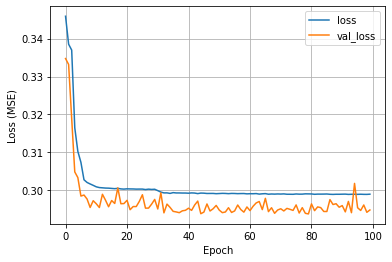

In [ ]:
plot_loss(history) # epoch vs loss graph

### **Optimizer SGD**

In [16]:
path='/content/drive/My\ Drive/BCML/Checkpoint/sgdchkpt.h5'
sgdchkpt = [
             ModelCheckpoint(path,monitor='val_loss',verbose=1)
]

In [17]:
wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20,input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8,callbacks=sgdchkpt)

Epoch 1/100
76570/76642 [============================>.] - ETA: 0s - loss: 0.3438
Epoch 00001: saving model to /content/drive/My\ Drive/BCML/Checkpoint/sgdchkpt.h5
76642/76642 [==============================] - 52s 673us/step - loss: 0.3438 - val_loss: 0.3213
Epoch 2/100
76580/76642 [============================>.] - ETA: 0s - loss: 0.3223
Epoch 00002: saving model to /content/drive/My\ Drive/BCML/Checkpoint/sgdchkpt.h5
76642/76642 [==============================] - 52s 683us/step - loss: 0.3223 - val_loss: 0.3166
Epoch 3/100
76618/76642 [============================>.] - ETA: 0s - loss: 0.3253
Epoch 00003: saving model to /content/drive/My\ Drive/BCML/Checkpoint/sgdchkpt.h5
76642/76642 [==============================] - 52s 673us/step - loss: 0.3253 - val_loss: 0.3119
Epoch 4/100
76641/76642 [============================>.] - ETA: 0s - loss: 0.3223
Epoch 00004: saving model to /content/drive/My\ Drive/BCML/Checkpoint/sgdchkpt.h5
76642/76642 [==============================] - 59s 772us

In [19]:
predictions = wider_model_tuned.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.30147116541131935
MAE (Mean Absolute Error) 0.35228434701455796
r^2 score 0.6974973013083497
RMSE (Root Mean Squared Error 0.5490638992060208


In [20]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
80,0.305305,0.294101,80
86,0.305015,0.294597,86
52,0.303733,0.294632,52
81,0.305182,0.295041,81
75,0.305261,0.295127,75
...,...,...,...
4,0.323519,0.318068,4
93,0.304754,0.321030,93
0,0.343777,0.321329,0
71,0.305438,0.327191,71


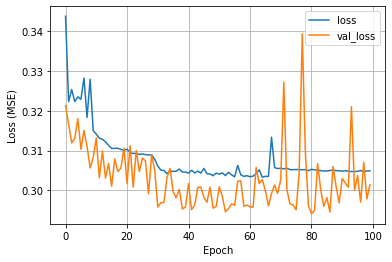

In [23]:
plot_loss(history_tuned) # epoch vs loss graph

### **Optimizer RMSprop**

In [24]:
wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [25]:
path='/content/drive/My\ Drive/BCML/Checkpoint/widerchkpt.h5'
rmspropchkpt = [
             ModelCheckpoint(path,monitor='val_loss',verbose=1)
]

In [26]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8,callbacks=rmspropchkpt)

Epoch 1/100
76622/76642 [============================>.] - ETA: 0s - loss: 0.3399
Epoch 00001: saving model to /content/drive/My\ Drive/BCML/Checkpoint/widerchkpt.h5
76642/76642 [==============================] - 50s 652us/step - loss: 0.3400 - val_loss: 0.3116
Epoch 2/100
76621/76642 [============================>.] - ETA: 0s - loss: 0.3151
Epoch 00002: saving model to /content/drive/My\ Drive/BCML/Checkpoint/widerchkpt.h5
76642/76642 [==============================] - 51s 663us/step - loss: 0.3151 - val_loss: 0.3216
Epoch 3/100
76558/76642 [============================>.] - ETA: 0s - loss: 0.3133
Epoch 00003: saving model to /content/drive/My\ Drive/BCML/Checkpoint/widerchkpt.h5
76642/76642 [==============================] - 50s 648us/step - loss: 0.3132 - val_loss: 0.3246
Epoch 4/100
76597/76642 [============================>.] - ETA: 0s - loss: 0.3127
Epoch 00004: saving model to /content/drive/My\ Drive/BCML/Checkpoint/widerchkpt.h5
76642/76642 [==============================] - 5

In [27]:
predictions = wider_model_rmsprop.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.32601569285124044
MAE (Mean Absolute Error) 0.3822550439401675
r^2 score 0.6728687907224129
RMSE (Root Mean Squared Error 0.5709778391945176


In [28]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
35,0.304907,0.296081,35
70,0.305665,0.296407,70
37,0.305104,0.296511,37
72,0.305687,0.297229,72
73,0.305577,0.297684,73
...,...,...,...
3,0.312669,0.322845,3
2,0.313219,0.324611,2
99,0.307882,0.326015,99
94,0.307541,0.334555,94


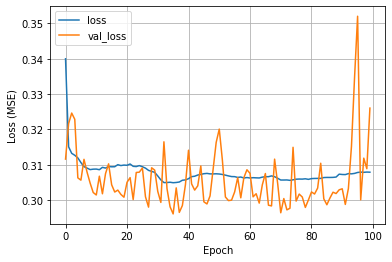

In [29]:
plot_loss(history_rmsprop) # epoch vs loss graph

# **Kesimpulan**

```
linear regression r^2 score 0.35420711441816666
Base Model DL r^2 score 0.6123442951395411
Deeper Model DL r^2 score 0.6721913997315295
Wider Model DL r^2 score 0.7042113806894539
opt SGD r^2 score 0.6974973013083497
opt RMSProp r^2 score 0.6728687907224129
```

Menurut hasil sekali run diatas Hasil yang di dapat untuk r^2 terbaik ada pada wider model dengan optimizer Adam 